# Анализ товарного ассортимента.

#1. [Формулирование бизнес-задачи.](#introduction)
#2. [Инструкция по выполнению проекта.](#instruction)
#3. [Загрузка и подготовка данных к анализу.](#loading)
#4. [Исследовательский анализ данных (EDA).](#analysis)
#5. [Проверка гипотез.](#hypothesis)
#6. [Выводы и рекомендации по работе с клиентами.](#output)

<a name="introduction"></a>
**Задача:**
Выстроить грамотное управление товарным ассортиментом, тем самым, увеличив объемы продаж.

**Описание данных:**

* date — дата заказа;
* customer_id — идентификатор покупателя;
* order_id — идентификатор заказа;
* product — наименование товара;
* quantity — количество товара в заказе;
* price — цена товара;


<a name="instruction"></a>
**Инструкция по выполнению проекта:**

**Шаг 1. Загрузка и подготовка данных к анализу:**

* Преобразуем данных к нужному типу.
* Обработаем пропуски при необходимости.
* Проверим на дубликаты.

**Шаг 2. Исследовательский анализ данных (EDA):**

* Разобьем товары на категории.
* Построим график объема продаж по категориям.
* Выделим основные и дополнительные товары по каждой категории.
* Разобьем товары на категории по сезонности.
* Сделаем кластеризацию категорий.

**Шаг 3. Проверка гипотез:**

* Сформулируем нулевую и альтернативную гипотезы;

**Шаг 4. Общий вывод и рекомендации.**

**Оформление:**
Задание необходимо выполнить в Jupyter Notebook. Программный код заполнить в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Применить форматирование и заголовки.

<a name="loading"></a>
**Шаг 1. Загрузка и подготовка данных к анализу.**

---
<div class="alert alert-block alert-success">

## Комментарий от наставника

Добавление плана в начале работы хорошая практика. Неиспользуемые импорты (например, RandomForestRegressor) лучше убирать из кода. Возможно, коллегам придется устанавливать себе некоторые библиотеки. А потом окажется, что они не используются.
</div>

---

In [2]:
#распечатаем первые 5 строк
ecommerce.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
#распечатаем его размер и первые 5 строк
ecommerce.shape

(6737, 6)

In [4]:
#посмотрим на сводную информацию о наборе данных
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [5]:
# тип данных столбца 'date' переведем в тип дата.
ecommerce['date'] = pd.to_datetime(ecommerce['date'], format='%Y%m%d%H')
ecommerce.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [6]:
# данными за какой период располагаем
ecommerce['date'].describe()

count                    6737
unique                   2606
top       2019-04-27 16:00:00
freq                       51
first     2018-10-01 00:00:00
last      2019-10-31 16:00:00
Name: date, dtype: object

In [7]:
#Проверим кол-во пропусков
ecommerce.isnull().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

In [8]:
# проверим на дубликаты
ecommerce.duplicated().sum()

0

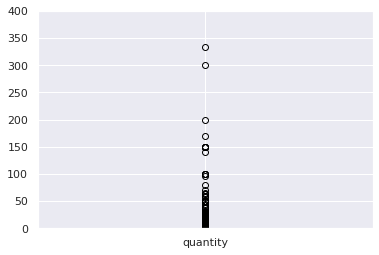

In [9]:
# построим boxplot, посмотрим на выбросы
ecommerce.boxplot(column='quantity')
plt.ylim(0, 400)
plt.show()

Больше 150 товаров в одном заказе, скорее всего оптовые клиенты, их не много, избавимся от них.

In [10]:
# перезапишем таблицу без выбросов
ecommerce = ecommerce.query('quantity < 150')
ecommerce

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [11]:
# посмотрим на уникальные заказы по всем параметрам, кроме даты
ecommerce_unique = ecommerce.groupby('order_id').agg({'order_id':'nunique', 'product':'nunique', 'date':'nunique'})
ecommerce_unique_query = ecommerce_unique.query('date > 1')
ecommerce_unique_query

,order_id,product,date
order_id,,,
13547,1,3,7
14500,1,10,4
14504,1,4,2
14505,1,5,2
14521,1,3,6
...,...,...,...
73101,1,1,2
73104,1,1,3
73108,1,1,2


In [12]:
ecommerce = ecommerce.drop_duplicates(['customer_id', 'order_id', 'product', 'quantity', 'price'])

In [13]:
ecommerce.query('order_id == 14521')

,date,customer_id,order_id,product,quantity,price
1471,2019-01-10 17:00:00,4d416cec-6f5b-4444-9b50-08770397714b,14521,Пеларгония зональная диам. 12 см белая полумах...,1,188.0
1472,2019-01-10 17:00:00,4d416cec-6f5b-4444-9b50-08770397714b,14521,Пеларгония зональная диам. 12 см красная махровая,1,188.0
1473,2019-01-10 17:00:00,4d416cec-6f5b-4444-9b50-08770397714b,14521,Пеларгония зональная диам. 12 см темнорозовая ...,1,188.0


Пропущенные значения и дубликаты отсутствуют. Данные верного типа и готовы к анализу. Выбросы удалили.

<a name="analysis"></a>
**Шаг 2. Исследовательский анализ данных (EDA)**

In [14]:
# проверим кол-во уникальных значений столбца 'product'
ecommerce['product'].value_counts()

Пеларгония розебудная Red Pandora укорененный черенок                              66
Пеларгония розебудная Prins Nikolai укорененный черенок                            57
Пеларгония зональная диам. 12 см сиреневый полумахровый                            52
Сумка-тележка 2-х колесная Gimi Argo синяя                                         47
Пеларгония розебудная Mary укорененный черенок                                     39
                                                                                   ..
Антуриум Андрианум розовый d-12 см                                                  1
Штора для ванной комнаты Bacchetta Fabric текстильная 180х200 см 3656               1
Пробка для ванны резиновая (Д-40 мм) 1206155                                        1
Сушилка для белья потолочно-настенная Gimi Lift 220, 5030                           1
Термокружка вакуумная Alpenkok из нержавеющей стали AK-04002A коричневая 400 мл     1
Name: product, Length: 2340, dtype: int64

In [15]:
# разобьем товары на категории с помощью лемматизации
# выделим уникальные слова из столбца 'product'
unique_word = ecommerce['product'].unique() 
# соеденим в строку
unique_word = ' '.join(unique_word)
# применим лемматизацию
lemmas = m.lemmatize(unique_word)
# вызовем специальный контейнер Counter из модуля collections
from collections import Counter
Counter(lemmas)

Counter({'комнатный': 26,
         ' ': 17681,
         'растение': 31,
         'в': 274,
         'горшок': 130,
         'алый': 3,
         'вера': 2,
         ', ': 1065,
         'd12': 3,
         'h30': 6,
         'кофе': 6,
         'арабика': 5,
         'h25': 1,
         'радермахер': 1,
         'd': 252,
         '-': 977,
         '12': 148,
         'см': 1062,
         'h': 61,
         '20': 73,
         'хризолидокарпус': 1,
         'лутесценс': 1,
         '9': 123,
         'циперус': 1,
         'зумула': 1,
         '25': 44,
         'шеффлер': 2,
         'лузеан': 1,
         'юкка': 1,
         'нитчатый': 1,
         '35': 8,
         'настенный': 30,
         'сушилка': 120,
         'для': 547,
         'белье': 144,
         'Gimi': 61,
         'Brio': 4,
         'Super': 7,
         '100': 57,
         'таз': 35,
         'пластмассовый': 59,
         '21': 20,
         ',': 295,
         '0': 164,
         'л': 253,
         'круглый': 23,
         

In [16]:
# создадим категории и впишем наименования
рассада = ['черенок','рассада', 'чили', 'лаванд', 'розмарин', 'радермахер', 'пеларгония', 'вишн', 'радермахер', 'помидор', 'хризолидокарпус', 'герань','петуния','лутесценс','бакопа', 'кассете','калибрахоа', 'базилик', 'петрушка', 'томат', 'кашпо', 'лобелия', 'циперус', 'фуксия', 'вербена', 'цветк', 'смесь', "микс", 'земляника', 'клубника', 'ель', 'упаков', 'зумула', 'укроп', 'шеффлер', 'лузеан', 'камнеломка', 'примула', 'вербейник', 'колокольчик', 'цикламен', 'барвинок', 'дыня', 'овсянница', 'папоротник', 'кипарис', 'юкка', 'бегония', 'осина', 'лузеан', 'арбуз']

сад = ['комнатн','растение', 'горш', 'сумка', 'тележ', 'бак ', 'мусор', 'ковш']
                   

дом = ['сушилка', 'гладил', 'глажен', 'покрытие', 'перчат', 'почтов', 'чехол','ковр', 'ткан', 'штор', 'ковер', 'термометр', 'ковёр', 'светил', 'весы', 'одеял', 'простын', 'подуш', 'плед', 'матрас', 'мыло', 'обув', 'покрывало', 'спальн', 'пылесос', 'наволочка', 'муляж', 'искусственн', 'полки', 'вешал', 'плечики', 'стеллаж', 'хранен', 'крючок', "этажерка", 'комод', 'подставка', 'полка', 'кофр', 'лоток']
           


кухня = ['блюдо','сковород','вилка','тарелк', 'ложка','фужер','посуд', 'кувшин', 'противень', 'соковыжим','лопатка', 'стакан','салатн','нож', 'бокал','чай','столов','банка','круж', 'толкушка','терка', 'варка','масл', 'чистка', 'салфет', 'антижир', 'кастрюл', 'webber','сахар', 'котел','wilmax', 'половник','скатерть', 'кипят','дозатор','зажиг','губка спираль', 'миска', 'термос', 'хлебница','кухон', 'кухн', 'бульон', 'выпеч', 'пресс', 'блюд']




ванная = ['таз','тряп', 'швабр', 'совок','ванн', 'полотен', 'стир', 'ёрш', 'щетка', 'сушилк', 'ерш', 'зуб', 'вантуз', 'халат', 'корыт', 'контейнер', 'ведр', 'урна', 'корзин', 'бидон', 'коробка', 'емкость', 'прищеп', 'налет', 'крем', 'веник', 'подрукавник', 'совком', 'для чистки', 'стирки', 'мыть', 'средство', 'мойк']


стройматериалы = ['инструмент', 'сверел', 'сверло', 'напильник', 'лестниц', 'стремянк', 'стяжк', 'шпингалет', 'сварка', 'миксер', 'крепеж', 'пружин', 'гвозд', 'петл', 'линейк', 'гои']

In [17]:
# присвоим категории 
ecommerce['category'] = 0
def categories(list_of_words, category):
    join = '|'.join(list_of_words)
    index = ecommerce[ecommerce['product'].str.lower().str.contains(join)].index.to_list()
    for i in index:
        ecommerce.loc[i, 'category'] = category
    return ecommerce


In [18]:
categories(рассада, 'рассада')
categories(сад, 'сад')
categories(дом, 'дом')
categories(кухня, 'кухня')
categories(ванная, 'ванная')
categories(стройматериалы, 'стройматериалы')
ecommerce['category'] = ecommerce['category'].apply(lambda x: 'иное' if (x==0) else x)

In [19]:
# сгруппируем таблицу
ecommerce_category = ecommerce.groupby('category').agg({'order_id':'nunique', 'price':'mean'})
ecommerce_category['order_id_percent'] = (ecommerce_category['order_id'] / sum(ecommerce_category['order_id'])).round(4)
ecommerce_category.sort_values(by='order_id_percent', ascending=False)

,order_id,price,order_id_percent
category,,,
ванная,708,842.148438,0.2347
дом,620,665.385733,0.2056
рассада,560,144.546204,0.1857
сад,468,1090.503828,0.1552
кухня,355,322.389163,0.1177
иное,213,270.436170,0.0706
стройматериалы,92,1305.123711,0.0305


В категорию 'иное' попало 7% товаров. 

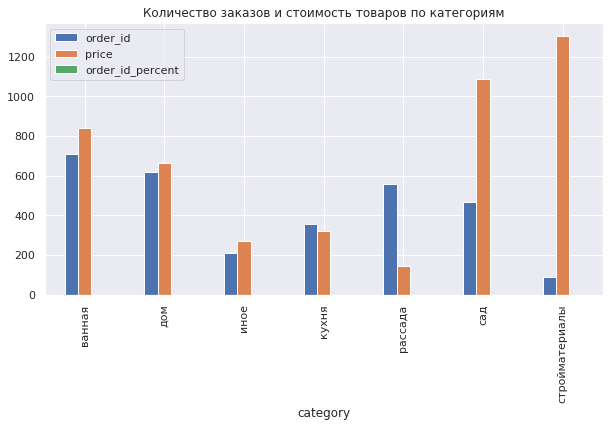

In [20]:
# Построим график количества заказов по категориям
ecommerce_category.plot(kind='bar', title = 'Количество заказов и стоимость товаров по категориям', figsize = (10,5));

Средняя цена в категории рассада самая низкая, а по количеству заказов эта категория на третьем месте. 
Стройматериалы по цене самые дорогие, но заказов меньше всего.


In [21]:
ecommerce_date = ecommerce.groupby(['date', 'category']).agg({'order_id': 'count'}).sort_values(by = 'order_id', ascending = False).reset_index()
ecommerce_date

,date,category,order_id
0,2019-04-27 16:00:00,рассада,42
1,2019-04-24 21:00:00,рассада,40
2,2019-05-31 22:00:00,рассада,29
3,2019-05-12 19:00:00,рассада,26
4,2019-05-02 16:00:00,рассада,24
...,...,...,...
2873,2019-02-24 11:00:00,сад,1
2874,2019-02-24 13:00:00,дом,1
2875,2019-02-24 13:00:00,рассада,1
2876,2019-02-24 14:00:00,рассада,1


In [22]:
ecommerce_date['month'] = ecommerce_date['date'].astype('datetime64[M]') 

In [23]:
# сгруппируем категории по заказам
ecommerce_top = ecommerce.groupby('category').agg({'order_id':'count'}).reset_index()
ecommerce_top.sort_values(by='order_id', ascending=False)

,category,order_id
4,рассада,1699
0,ванная,768
1,дом,757
5,сад,653
3,кухня,609
2,иное,282
6,стройматериалы,97


In [24]:
ecommerce.sort_values('quantity', ascending=False).head()

,date,customer_id,order_id,product,quantity,price,category
586,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0,дом
6535,2019-10-07 11:00:00,d933280e-5372-448f-be44-b269c8bafc2a,72885,"Крепеж для пружины дверной оцинкованный, 1107054",100,19.0,стройматериалы
1555,2019-01-21 09:00:00,8eabcaca-e8c8-4eee-9079-4ff5f612273a,69893,Щетка для мытья посуды КОЛИБРИ М5202 большая,100,34.0,ванная
6707,2019-10-28 10:00:00,018fb729-3525-4314-8e4d-1982b1062f9f,73110,"Шпингалет 80 мм белый с пружиной, 1102188",100,44.0,стройматериалы
1103,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,69206,"Щетка для посуды *ОЛЯ*, Мультипласт 1807010",100,26.0,ванная


На графике видно, что:
1. Категория 'ванная' востребована в феврале.
2. Категория 'дом' имеет пик заказов в декабре, могу предположить, что это связано с НГ.
3. Категория 'кухня' в июне имеет спад.
4. Категория 'рассада' с мая по июнь находится на пике, с октября по январь на спаде.
5. Категория 'сад' имеет пик с апреля по май, спад в январе.
6. Категория 'стройматериалы' имеет небольшой скачок в январе и мае;

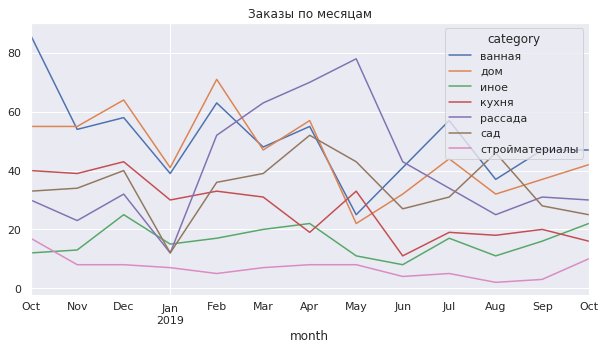

In [25]:
ecommerce_date.pivot_table(index='month', columns='category', values='order_id', aggfunc='count')\
    .plot(style='-', grid=True, figsize=(10,5), title='Заказы по месяцам');

In [26]:
ecommerce_category

,order_id,price,order_id_percent
category,,,
ванная,708,842.148438,0.2347
дом,620,665.385733,0.2056
иное,213,270.436170,0.0706
кухня,355,322.389163,0.1177
рассада,560,144.546204,0.1857
сад,468,1090.503828,0.1552
стройматериалы,92,1305.123711,0.0305


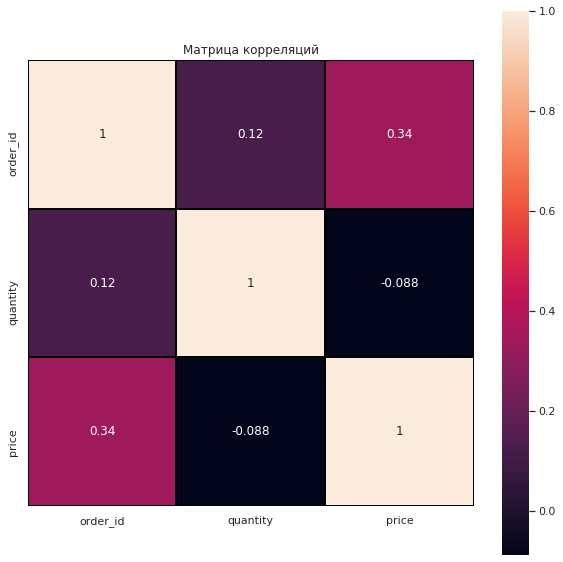

In [27]:
# сделаем кластеризацию категорий.
plt.figure(figsize=(10,10))
sns.heatmap(ecommerce.corr(), annot=True, square=True, linewidths=1, linecolor='black')
plt.title('Матрица корреляций')
plt.show()

In [28]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4865 entries, 0 to 6735
Data columns (total 7 columns):
date           4865 non-null datetime64[ns]
customer_id    4865 non-null object
order_id       4865 non-null int64
product        4865 non-null object
quantity       4865 non-null int64
price          4865 non-null float64
category       4865 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 464.1+ KB


Кластеризация категорий.

In [29]:
ecommerce['test_column'] = 1
classification = ecommerce.pivot_table(index = 'order_id', columns = 'category', values='test_column', aggfunc='mean')
classification = classification.reset_index()
classification = classification.fillna(0)
# обучаем нормализатор и преобразуем набор данных 
X = classification.drop(['order_id'], axis = 1)
# стандартизируем данные
scaler = StandardScaler()
# обучаем нормализатор и преобразуем набор данных 
X_st = scaler.fit_transform(X)
# сохраним в таблицу linked связь между объектами
linked = linkage(X_st, method='ward')

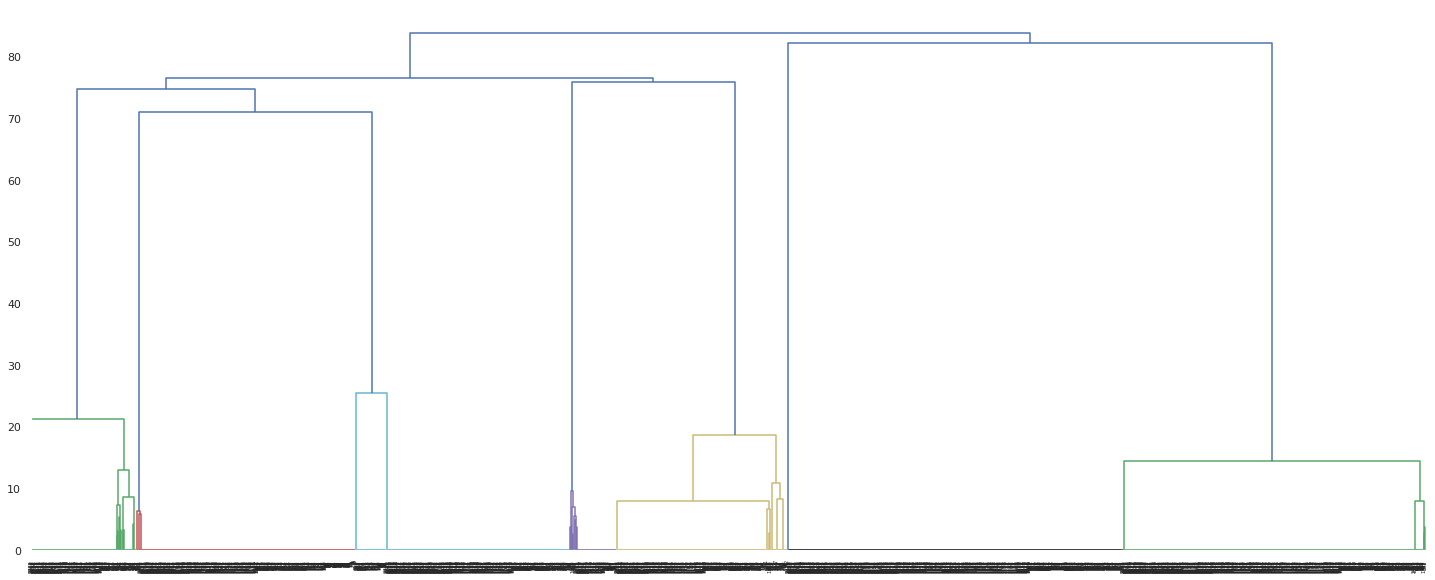

In [30]:
# визуализируем дендрограмму
plt.figure(figsize=(25, 10))
dendrogram(linked, orientation='top')
plt.show()

Можно видеть, что в результате иерархической кластеризации данных естественным образом произошло разбиение на кластеры, обозначенные на рисунке различным цветом. При этом исходно число кластеров не задавалось.

In [31]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_st)
# сохраняем метки кластера в поле нашего датасета
classification['cluster'] = labels

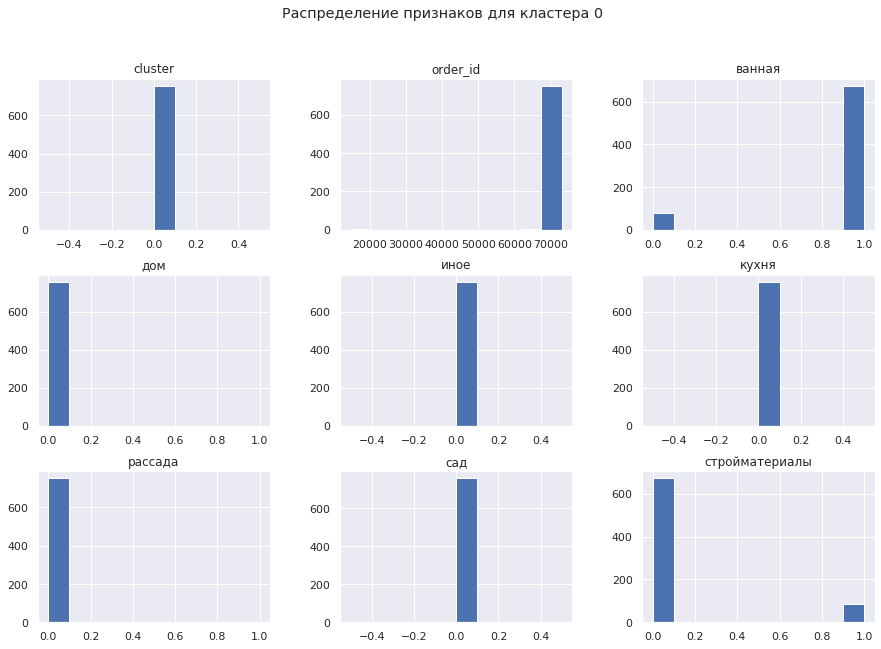

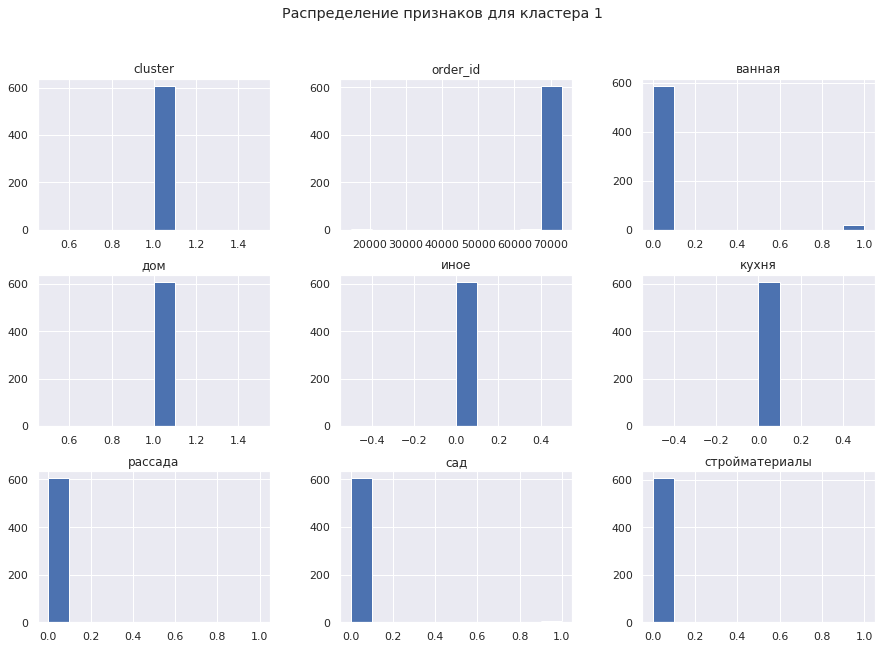

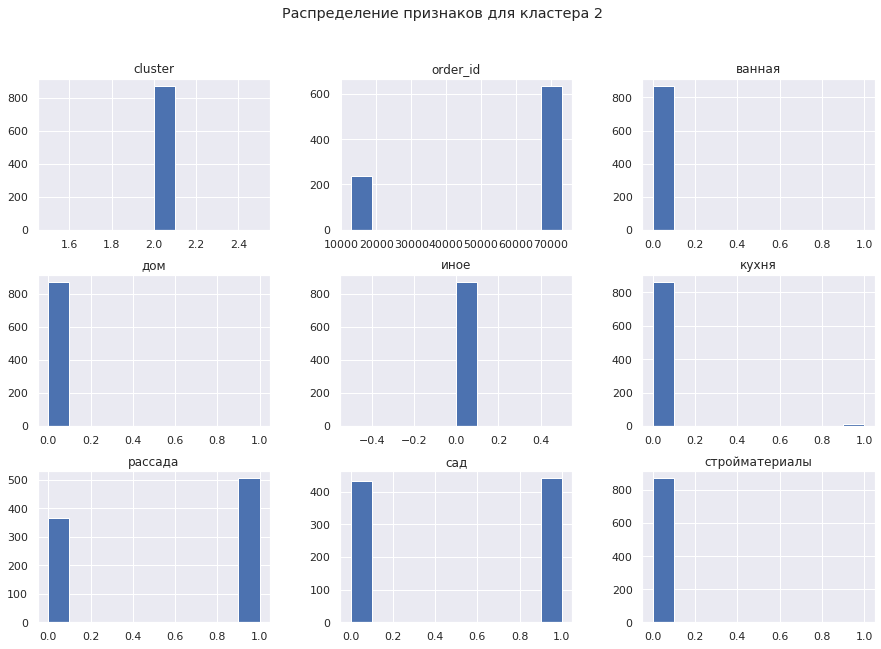

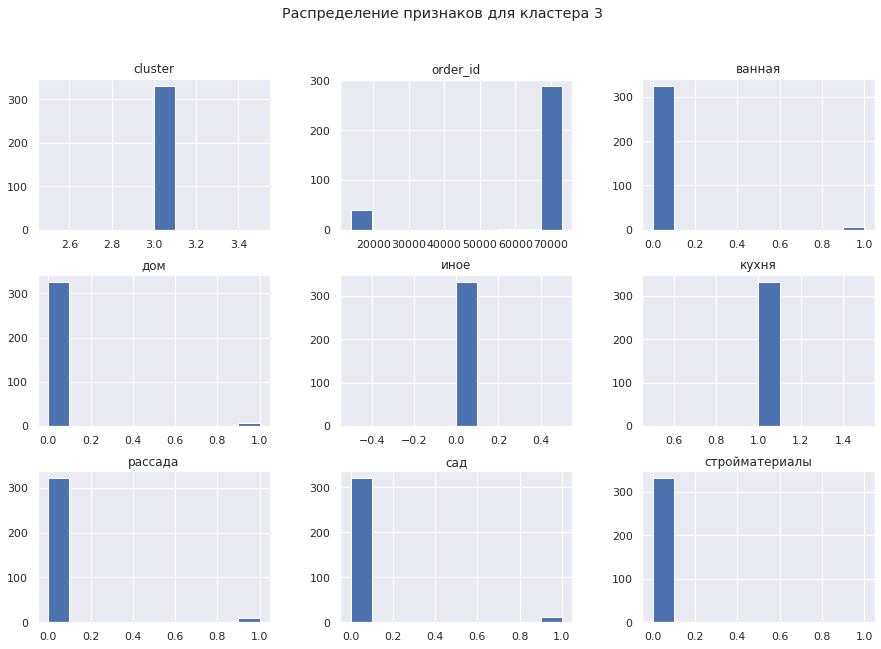

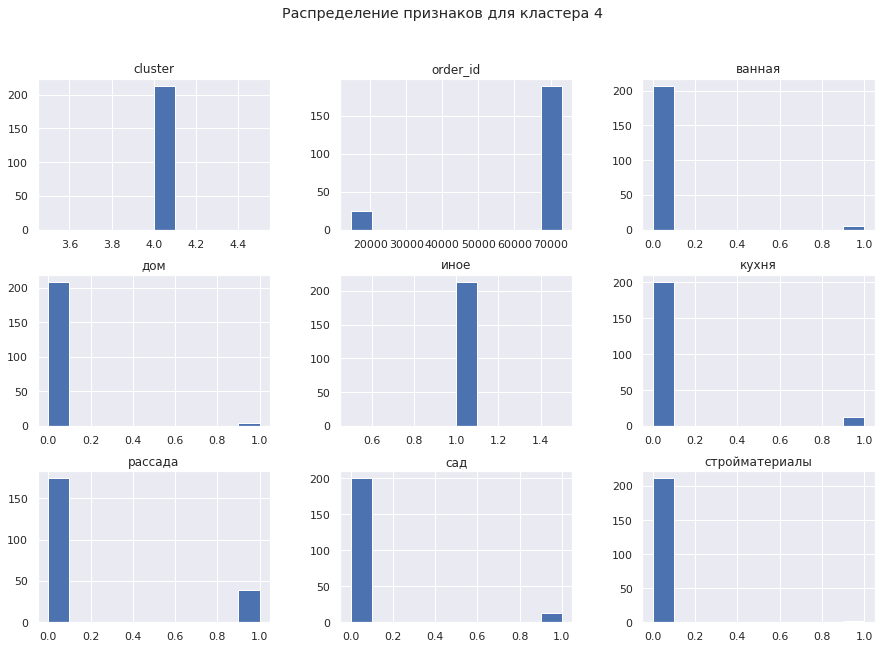

In [32]:
# построим графики распределения признаков по кластерам
for i in [0, 1, 2, 3, 4]:
    classification[classification['cluster']==i].hist(figsize=(15,10))
    plt.suptitle('Распределение признаков для кластера {}'.format(i))
    plt.show()

In [33]:
#посчитаем долю для каждого кластера
classification.groupby('cluster').mean()

category,order_id,ванная,дом,иное,кухня,рассада,сад,стройматериалы
cluster,,,,,,,,
0,70601.274172,0.894040,0.001325,0.0,0.000000,0.005298,0.000000,0.111258
1,70607.728171,0.032949,1.000000,0.0,0.000000,0.004942,0.006590,0.003295
2,55722.742824,0.001148,0.001148,0.0,0.012629,0.578645,0.505166,0.003444
3,63594.114804,0.018127,0.018127,0.0,1.000000,0.030211,0.033233,0.003021
4,64551.117371,0.028169,0.023474,1.0,0.061033,0.183099,0.061033,0.009390


<div class="alert alert-info">

    
Мы выделели группы с похожими чертами и определелили их в разные кластеры. В таблице столбец 'cluster' отвечает за номера кластеров, в строке данные о среднем количестве заказов в каждом кластере по каждой категории. Таким образом, мы видим, что: 

* Количество заказов в кластерах №1,3 больше, чем в кластере №4.

* В кластере № 1 большое количество заказов по категории "ванная".

* В кластере № 3 большое количество заказов по категории "дом".

* В кластере № 4 большое количество заказов по категории "рассада".
    
    </div>

<a name="hypothesis"></a>
**Шаг 3. Проверка гипотез**

Сформулируем гипотезы:

Нулевая гипотеза - Статистически значимое различие по цене между группами отсутствует.

Альтернативная группа -Статистически значимое различие по цене между группами имеется. 

In [34]:
# проверим гипотезу с помощью z_test, сравним категории между собой катогории
def z_test (group, category1, category2, alpha, column='category'):
    sample1 = ecommerce.loc[ecommerce[column] == category1, 'price']
    sample2 = ecommerce.loc[ecommerce[column] == category2, 'price']
    results=st.ttest_ind(sample1, sample2, equal_var = False) 
    if (results.pvalue < alpha):
        result = "Отвергаем нулевую гипотезу"
    else:
        result = "Не получилось отвергнуть нулевую гипотезу"
    
    return [category1, sample1.mean(), category2, sample2.mean(), '{:.5}'.format(str(alpha)), str(results.pvalue), result]

data = []
list_category = []

for category1 in ecommerce['category'].unique():
    list_category.append(category1)
    for category2 in ecommerce['category'].unique():
        if category2 not in list_category:
            alpha = 0.05
            data.append(z_test(ecommerce, category1, category2, alpha))

columns = ['group_1', 'mean_price_group_1','group_2', 'mean_price_group_2', 'alpha', 'p-value', 'hypothesis']    
hipothesis = pd.DataFrame(columns=columns, data=data)
hipothesis

,group_1,mean_price_group_1,group_2,mean_price_group_2,alpha,p-value,hypothesis
0,сад,1090.503828,рассада,144.546204,0.05,3.8016963752295046e-46,Отвергаем нулевую гипотезу
1,сад,1090.503828,ванная,842.148438,0.05,0.0006977669879458447,Отвергаем нулевую гипотезу
2,сад,1090.503828,дом,665.385733,0.05,2.355450303866797e-09,Отвергаем нулевую гипотезу
3,сад,1090.503828,кухня,322.389163,0.05,9.825290851538962e-31,Отвергаем нулевую гипотезу
4,сад,1090.503828,иное,270.436170,0.05,4.51629957490805e-33,Отвергаем нулевую гипотезу
5,сад,1090.503828,стройматериалы,1305.123711,0.05,0.20138831904633753,Не получилось отвергнуть нулевую гипотезу
6,рассада,144.546204,ванная,842.148438,0.05,3.7910123523474114e-57,Отвергаем нулевую гипотезу
7,рассада,144.546204,дом,665.385733,0.05,5.343055688551735e-43,Отвергаем нулевую гипотезу
8,рассада,144.546204,кухня,322.389163,0.05,3.842811819400557e-20,Отвергаем нулевую гипотезу
9,рассада,144.546204,иное,270.436170,0.05,2.547436354152652e-07,Отвергаем нулевую гипотезу


Почти все группы по цене разные, кроме группы 'кухня' и 'иное'.

<a name="output"></a>
**Шаг 4. Общий вывод и рекомендации.**

Мною был выполнен анализ данных о заказах с 01.10.2018 г. по 31.10.2019 г. Данные полные, без дубликатов. Я выделила данные в 6 категорий, а именно: 
1.	Рассада;
    Пользуется спросом с мая по июнь, по цене это самый дешевый товар, но по количеству заказов  занимает третье место.
2.	Сад;
    Пользуется спросом с апреля по май, спад в январе. Стоимость товара высокая, количество заказов тоже.  
3.	Дом;
    Имеет пик заказов в декабре, могу предположить, что это связано с НГ. 
4.	Кухня;
    В июне имеет сильный спад. Стоимость заказов невысокая. 
5.	Ванная;
    Заказы по этой категории совершаются в течение всего года, стоимость товара высокая.
6.	Стройматериалы.
    Стройматериалы не имеют скачков, стоимость товара самая высокая, а вот количество заказов меньше всего. 

При проверке гипотезы, выяснила, что цены в группах разные. 


In [53]:
writer = pd.ExcelWriter("path.xlsx")
ecommerce.to_excel(excel_writer=writer, sheet_name='Sheet1', na_rep="")

writer.save()